In [1]:
from pprint import pprint

я работала вместе с Ликой Джиоевой

## 0. часть кода из первой части, чтобы взять пайморфи:

In [2]:
from pymystem3 import Mystem

In [3]:
m = Mystem()

In [4]:
with open("yoga-sna.txt_Ascii.txt", encoding="utf-8") as f:
    text = f.read()

In [5]:
anad_text = m.analyze(text)

In [6]:
import nltk
from nltk.tokenize import word_tokenize

In [7]:
tokens = word_tokenize(text)

In [8]:
from pymorphy2 import MorphAnalyzer

In [9]:
morph = MorphAnalyzer()

In [10]:
pymd_text = []

for token in tokens:
    pym = morph.parse(token)
    pymd_text.append(pym)

## 1. переводим разметку в датафрейм:

In [11]:
import pandas as pd

In [12]:
def convert(tag):
    if tag is None:
        return tag
    else:
        return str(tag)

### создаем список из словарей с параметрами для каждого слова

In [13]:
data = []

for item in pymd_text:
    unit = item[0]
    data.append(({'word': convert(unit.word), 'lemma': convert(unit.normal_form), 
'POS': convert(unit.tag.POS), 'animacy': convert(unit.tag.animacy), 
'aspect': convert(unit.tag.aspect), 'case': convert(unit.tag.case),
'gender': convert(unit.tag.gender), 'involvement': convert(unit.tag.involvement), 
'mood': convert(unit.tag.mood), 'number': convert(unit.tag.number), 
'person': convert(unit.tag.person), 'tense': convert(unit.tag.tense),
'transitivity': convert(unit.tag.transitivity), 'voice': convert(unit.tag.voice)}))

### датафрейм:

In [14]:
df = pd.DataFrame(data)

df

,word,lemma,POS,animacy,aspect,case,gender,involvement,mood,number,person,tense,transitivity,voice
0,чогьял,чогьял,NOUN,inan,None,nomn,masc,None,None,sing,None,None,None,None
1,намхай,намхая,NOUN,anim,None,gent,femn,None,None,plur,None,None,None,None
2,норбу,норба,NOUN,inan,None,accs,femn,None,None,sing,None,None,None,None
3,ринпоче,ринпочий,ADJS,None,None,None,neut,None,None,sing,None,None,None,None
4,.,.,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28452,дня,день,NOUN,inan,None,gent,masc,None,None,sing,None,None,None,None
28453,и,и,CONJ,None,None,None,None,None,None,None,None,None,None,None
28454,ночи,ночь,NOUN,inan,None,loc2,femn,None,None,sing,None,None,None,None
28455,'','',None,None,None,None,None,None,None,None,None,None,None,None


## 2. графики:

In [15]:
import matplotlib.pyplot as plt

### возьмем части речи и их количество

In [16]:
lemmd_list = []
for item in pymd_text:
    unit = item[0]
    lemmd_list.append([unit.normal_form, unit.tag.POS])

In [17]:
from collections import Counter

In [18]:
part = []
for i in lemmd_list:
    part.append(i[1])
total = Counter(part)
parts = list(total.items())

### построим их scatter plot 

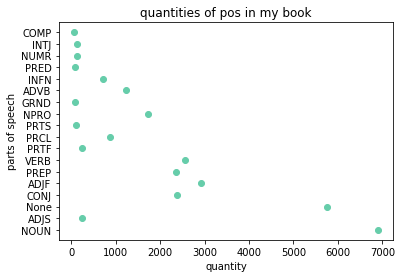

In [19]:
X = []
Y = []

for i in range(len(parts)):
    X.append(str(parts[i][0]))
    Y.append(parts[i][1])

plt.scatter(Y, X, color='MediumAquamarine')
plt.title('quantities of pos in my book')
plt.ylabel('parts of speech')
plt.xlabel('quantity')
plt.show()

#### я использую scatter plot, потому что по оси Х - количество употреблений POS, а по оси Y - POS. Я хочу посмотреть на то, сколько примерно каждой POS есть в книге и сравнить эти значения

### возьмем топ 5 глаголов и их количество

In [20]:
verb = []
for unit in lemmd_list:
    if unit[1] == 'VERB':
        verb.append(unit[0])
verb_total = Counter(verb)
verbs = verb_total.most_common(5)

### построим их bar plot 

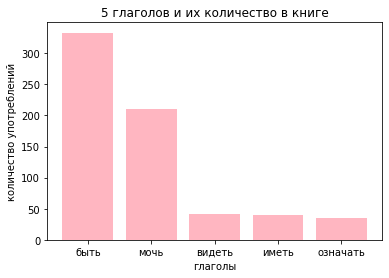

In [21]:
X = []
Y = []

for i in range(len(verbs)):
    X.append(verbs[i][0])
    Y.append(verbs[i][1])
    
plt.bar(X, Y, color='LightPink')
plt.title('5 глаголов и их количество в книге')
plt.ylabel('количество употреблений')
plt.xlabel('глаголы')
plt.show()

#### я использую барплот, потому что по оси Х - глаголы, а по оси Y - их суммарное количество . Я хочу наглядно посмотреть на разницу в употреблениях глаголов

### возьмем часть наречий и их количество

In [22]:
adverb = []
for unit in lemmd_list:
    if unit[1] == 'ADVB':
        adverb.append(unit[0])
adverb_total = Counter(adverb)
adverbs = adverb_total.most_common(420)

In [23]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

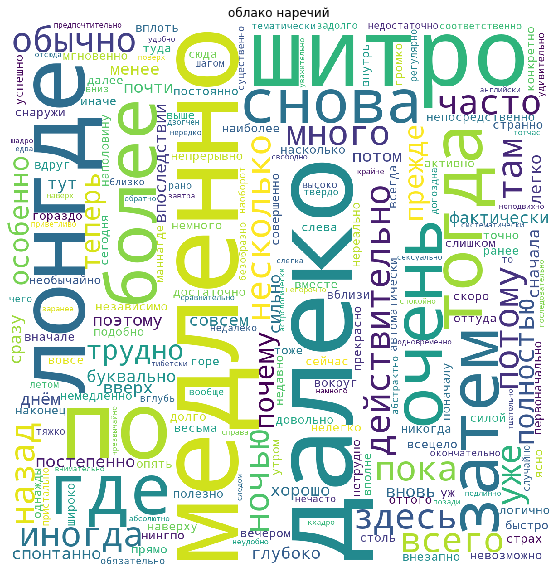

In [24]:
text = ' '.join([adverbs[i][0] for i in range(len(adverbs))])

wordcloud = WordCloud(
    background_color ='white',
    width = 1200,
    height = 1200, 
).generate(text)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('облако наречий')
plt.show()

#### я использую wordcloud, потому что хочу визуализировать большое количество наречий из книги

## 3. 2 моих визуализации

### piechart по количеству падежей слов из моей книги 

Text(0.5, 1.0, 'cases')

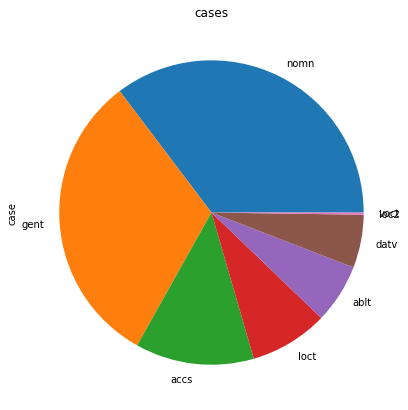

In [25]:
plt.figure(figsize=(7, 7))
df['case'].value_counts().plot(kind='pie')
plt.title('cases')

#### я использую piechart, потому что у меня есть много показателей, и я хочу оценить, какого из них больше, представив это именно в таком виде

### построим box plot 

In [27]:
import seaborn as sns

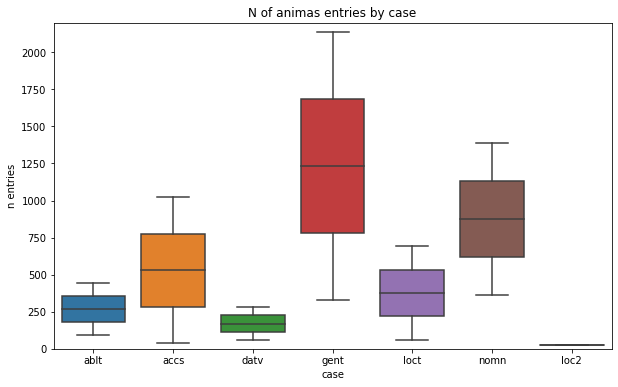

In [34]:
df2 = df[['animacy', 'case', 'gender']].groupby(['animacy', 'case'], as_index=False).count()
df2.columns = ['animacy', 'case', 'total']
df2 = df2[df2['total'] > 10]

plt.figure(figsize=(10, 6))
sns.boxplot(x = "case", y = "total", data = df2)
plt.ylim((0, 2200))
plt.title('N of animas entries by case')
plt.ylabel('n entries')
plt.xlabel('case');

## 4. освоим nltk dispersion plot и сделаем  график по героям моей книги

In [ ]:
hero = []
for unit in lemmd_list:
    if unit[1] == 'NOUN':
        hero.append(unit[0])

In [ ]:
heroes = nltk.Text(hero)

In [ ]:
heroes.dispersion_plot(["человек", "мастер", "существо", "учитель", "тело"])